In [1]:
%matplotlib inline

In [2]:
import pynamics
from pynamics.frame import Frame
from pynamics.variable_types import Differentiable,Constant
from pynamics.system import System
from pynamics.body import Body
from pynamics.dyadic import Dyadic
from pynamics.output import Output,PointsOutput
from pynamics.output_points_3d import PointsOutput3D
from pynamics.constraint import AccelerationConstraint,KinematicConstraint
from pynamics.particle import Particle
import pynamics.integration
import numpy
import matplotlib.pyplot as plt
plt.ion()
from math import pi,sin
import sympy
from sympy import sqrt
import math
import scipy.optimize
from matplotlib import animation, rc
from IPython.display import HTML


system = System()
pynamics.set_system(__name__,system)

In [3]:
#Defining Constants of System
lA = Constant(1,'lA',system)
lB = Constant(1,'lB',system)
lC = Constant(1,'lC',system)
lD = Constant(1,'lD',system)
lE = Constant(1,'lE',system)
lF = Constant(1,'lF',system)
lG = Constant(1,'lG',system)
lP = Constant(5,'lP',system)

mA = Constant(0.5,'mA',system)
mB = Constant(0.5,'mB',system)
mC = Constant(0.5,'mC',system)
mD = Constant(0.5,'mD',system)
mE = Constant(0.5,'mE',system)
mF = Constant(0.5,'mF',system)
mG = Constant(0.5,'mF',system)

g = Constant(9.81,'g',system)
b = Constant(1e0,'b',system)
k = Constant(1e0,'k',system)

freq = Constant(.1,'freq',system)
amp = Constant(55*pi/180,'torque',system)

Ixx_A = Constant(1,'Ixx_A',system)
Iyy_A = Constant(1,'Iyy_A',system)
Izz_A = Constant(1,'Izz_A',system)
Ixx_B = Constant(1,'Ixx_B',system)
Iyy_B = Constant(1,'Iyy_B',system)
Izz_B = Constant(1,'Izz_B',system)
Ixx_C = Constant(1,'Ixx_C',system)
Iyy_C = Constant(1,'Iyy_C',system)
Izz_C = Constant(1,'Izz_C',system)
Ixx_D = Constant(1,'Ixx_D',system)
Iyy_D = Constant(1,'Iyy_D',system)
Izz_D = Constant(1,'Izz_D',system)
Ixx_E = Constant(1,'Ixx_E',system)
Iyy_E = Constant(1,'Iyy_E',system)
Izz_E = Constant(1,'Izz_E',system)
Ixx_F = Constant(1,'Ixx_F',system)
Iyy_F = Constant(1,'Iyy_F',system)
Izz_F = Constant(1,'Izz_F',system)
Ixx_G = Constant(1,'Ixx_G',system)
Iyy_G = Constant(1,'Iyy_G',system)
Izz_G = Constant(1,'Izz_G',system)

In [4]:
#Set integration tolerance
tol = 1e-4

In [5]:
#Set simulation run time
tinitial = 0
tfinal = 10
fps = 30
tstep = 1/fps
t = numpy.r_[tinitial:tfinal:tstep]

In [6]:
#Define derivatives of frames
qA,qA_d,qA_dd = Differentiable('qA',system)
qB,qB_d,qB_dd = Differentiable('qB',system)
qC,qC_d,qC_dd = Differentiable('qC',system)
qD,qD_d,qD_dd = Differentiable('qD',system)
qE,qE_d,qE_dd = Differentiable('qE',system)
qF,qF_d,qF_dd = Differentiable('qF',system)
qG,qG_d,qG_dd = Differentiable('qG',system)

In [7]:
#set initial conditions
initialvalues = {}
initialvalues[qA]=50*pi/180
initialvalues[qA_d]=0*pi/180
initialvalues[qB]=20*pi/180
initialvalues[qB_d]=0*pi/180
initialvalues[qC]=0*pi/180
initialvalues[qC_d]=0*pi/180
initialvalues[qD]=0*pi/180
initialvalues[qD_d]=0*pi/180
initialvalues[qE]=-20*pi/180
initialvalues[qE_d]=0*pi/180
initialvalues[qF]=-50*pi/180
initialvalues[qF_d]=0*pi/180
initialvalues[qG]=0*pi/180
initialvalues[qG_d]=0*pi/180


statevariables = system.get_state_variables()
ini = [initialvalues[item] for item in statevariables]

In [8]:
#Frames
N = Frame('N',system)
A = Frame('A',system)
B = Frame('B',system)
C = Frame('C',system)
D = Frame('D',system)
E = Frame('E',system)
F = Frame('F',system)
G = Frame('G',system)

system.set_newtonian(N)

A.rotate_fixed_axis(N,[0,0,1],qA,system)
B.rotate_fixed_axis(N,[0,0,1],qB,system)
C.rotate_fixed_axis(N,[0,0,1],qC,system)
D.rotate_fixed_axis(N,[0,0,1],qD,system)
E.rotate_fixed_axis(N,[0,0,1],qE,system)
F.rotate_fixed_axis(N,[0,0,1],qF,system)
G.rotate_fixed_axis(N,[0,0,1],qG,system)

In [9]:
#Vectors
pNA=0*N.x + 0*N.y + 0*N.z
pAB= pNA + lA*A.x
pBC = pAB + lB*B.x
pCD = pBC + lC*C.x
pDE = pCD + lD*D.x
pEF = pDE + lE*E.x
pFG = pEF + lF*F.x
pGtip = pFG + lG*G.x
pP = lP*N.x

#Center of Mass
pAcm=pNA+lA/2*A.x
pBcm=pAB+lB/2*B.x
pCcm=pBC+lC/2*C.x
pDcm=pCD+lD/2*D.x
pEcm=pDE+lE/2*E.x
pFcm=pEF+lF/2*F.x
pGcm=pFG+lF/2*G.x

#Angular Velocity
wNA = N.get_w_to(A)
wAB = A.get_w_to(B) 
wBC = B.get_w_to(C)
wCD = C.get_w_to(D) 
wDE = D.get_w_to(E)
wEF = E.get_w_to(F)
wFG = F.get_w_to(G)

#Velocities 
vGtip=pGtip.time_derivative()

#Interia and Bodys
IA = Dyadic.build(A,Ixx_A,Iyy_A,Izz_A)
IB = Dyadic.build(B,Ixx_B,Iyy_B,Izz_B)
IC = Dyadic.build(C,Ixx_C,Iyy_C,Izz_C)
ID = Dyadic.build(D,Ixx_D,Iyy_D,Izz_D)
IE = Dyadic.build(E,Ixx_E,Iyy_E,Izz_E)
IF = Dyadic.build(F,Ixx_F,Iyy_F,Izz_F)
IG = Dyadic.build(G,Ixx_G,Iyy_G,Izz_G)

BodyA = Body('BodyA',A,pAcm,mA,IA,system)
BodyB = Body('BodyB',B,pBcm,mB,IB,system)
BodyC = Body('BodyC',C,pCcm,mC,IC,system)
BodyD = Body('BodyD',D,pDcm,mD,ID,system)
BodyE = Body('BodyE',E,pEcm,mE,IE,system)
BodyF = Body('BodyF',F,pFcm,mF,IF,system)
BodyG = Body('BodyG',G,pGcm,mG,IG,system)

In [10]:
#Forces

#Damping Forces
system.addforce(-b*wNA,wNA)
system.addforce(-b*wAB,wAB)
system.addforce(-b*wBC,wBC)
system.addforce(-b*wCD,wCD)
system.addforce(-b*wDE,wDE)
system.addforce(-b*wEF,wEF)
system.addforce(-b*wFG,wFG)

#Spring Force (Torsion)
system.add_spring_force1(k,(qA)*N.z,wNA) 
system.add_spring_force1(k,(qB-qA)*N.z,wAB)
system.add_spring_force1(k/2,(qC-qB)*N.z,wBC)
system.add_spring_force1(k/2,(qD-qC)*N.z,wCD) 
system.add_spring_force1(k,(qE-qD)*N.z,wDE)
system.add_spring_force1(k,(qF-qE)*N.z,wEF)
system.add_spring_force1(k,(qG-qF)*N.z,wFG)

(<pynamics.force.Force at 0x1861b4bad30>,
 <pynamics.spring.Spring at 0x1861b4ba2e0>)

In [11]:
#Constraints for initial condition

eq = []

eq.append(pFG-pP)
    
eq_scalar = []
eq_scalar.append(eq[0].dot(N.x))
eq_scalar.append(eq[0].dot(N.y))

In [12]:
#Solve for Intial Conditions
qi = [qA]
qd = [qB,qC,qD,qE,qF]

constants = system.constant_values.copy()
defined = dict([(item,initialvalues[item]) for item in qi])
constants.update(defined)

eq_scalar = [item.subs(constants) for item in eq_scalar]
error = (numpy.array(eq_scalar)**2).sum()

f = sympy.lambdify(qd,error)

def function(args):
    return f(*args)

guess = [initialvalues[item] for item in qd]

result = scipy.optimize.minimize(function,guess)
if result.fun>1e-3:
    raise(Exception("out of tolerance"))
    
ini = []
for item in system.get_state_variables():
    if item in qd:
        ini.append(result.x[qd.index(item)])
    else:
        ini.append(initialvalues[item])

In [13]:
#Adding Dynamic Constraints

#Position of motor limits
pos = amp*sympy.cos(freq*2*pi*system.t)

eq = []

eq.append(pFG-pP)
eq.append(pos*N.z-qA*N.z)

eq_scalar = []
eq_scalar.append(eq[0].dot(N.x))
eq_scalar.append(eq[0].dot(N.y))
eq_scalar.append(eq[1].dot(N.z))
eq_scalar_d = [system.derivative(item) for item in eq_scalar]
eq_scalar_dd = [system.derivative(item) for item in eq_scalar_d]

system.add_constraint(AccelerationConstraint(eq_scalar_dd))

2022-02-15 09:53:43,534 - pynamics.system - INFO - getting dynamic equations
2022-02-15 09:53:44,914 - pynamics.system - INFO - solving a = f/m and creating function
2022-02-15 09:53:46,491 - pynamics.system - INFO - substituting constrained in Ma-f.
2022-02-15 09:53:46,802 - pynamics.system - INFO - done solving a = f/m and creating function
2022-02-15 09:53:46,836 - pynamics.integration - INFO - beginning integration
2022-02-15 09:53:46,836 - pynamics.system - INFO - integration at time 0000.00
2022-02-15 09:53:47,060 - pynamics.integration - INFO - finished integration


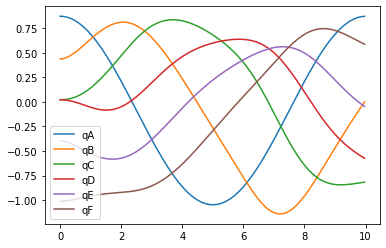

In [14]:
#Solve model and plot angles

f,ma = system.getdynamics()

func1 = system.state_space_post_invert(f,ma,return_lambda = False)

states=pynamics.integration.integrate(func1,ini,t,rtol=tol,atol=tol,hmin=tol, args=({'constants':system.constant_values},))


plt.figure()
artists = plt.plot(t,states[:,:6])
plt.legend(artists,['qA','qB','qC','qD','qE','qF','qG'])

2022-02-15 09:53:47,382 - pynamics.output - INFO - calculating outputs
2022-02-15 09:53:47,438 - pynamics.output - INFO - done calculating outputs


<AxesSubplot:>

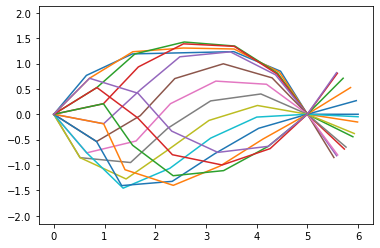

In [15]:
points = [pNA,pAB,pBC,pCD,pDE,pEF,pFG,pGtip]
points_output = PointsOutput(points,system)
y = points_output.calc(states,t)
points_output.plot_time(20)

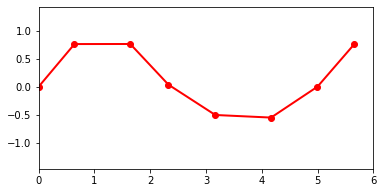

In [20]:
points_output.animate(fps = fps,movie_name = 'render.mp4',lw=2,marker='o',color=(1,0,0,1),linestyle='-')
HTML(points_output.anim.to_html5_video())